In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astroML.datasets import fetch_LINEAR_sample
LINEAR_data = fetch_LINEAR_sample()

# use seaborn for plot styles
import seaborn; seaborn.set()
LINEAR_data = fetch_LINEAR_sample()
star_id = 10040133
t1, mag1, dmag1 = LINEAR_data.get_light_curve(star_id).T
print(type(t1))

<class 'numpy.ndarray'>


In [2]:
# t1

In [4]:
# ls

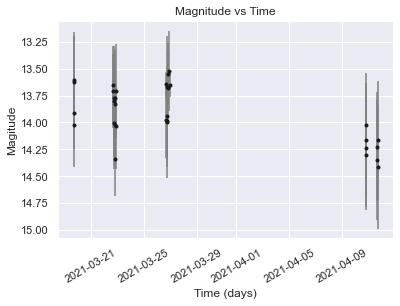

In [62]:
from dateutil import parser

df = pd.read_csv("info.csv")
df = df.drop([21])
t=df['time'].to_numpy()
for i in range(len(t)):
    t[i]=parser.parse(t[i])
mag=df['Magnitude'].to_numpy()
dmag=df['Magnitude error'].to_numpy()


fig, ax = plt.subplots()
ax.errorbar(t, mag, dmag, fmt='.k', ecolor='gray')
ax.set(xlabel='Time (days)', ylabel='Magitude',
       title='Magnitude vs Time')
ax.invert_yaxis();
plt.xticks(rotation=30) 
plt.savefig('Magnitude vs Time.png', dpi=300, bbox_inches='tight')

In [63]:
# t

In [64]:
t2 = [t_iter.timestamp()/(24*3600) for t_iter in t]
t2 = t2 - np.min(t2)

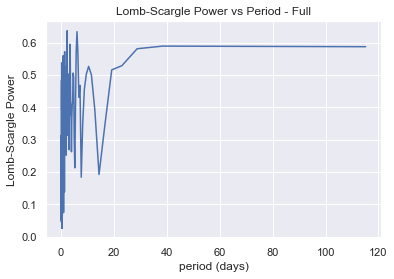

In [106]:
from gatspy.periodic import LombScargle
model = LombScargle().fit(t2, mag, dmag)
periods, power = model.periodogram_auto(nyquist_factor=10)

fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlabel='period (days)',
       ylabel='Lomb-Scargle Power');
plt.title("Lomb-Scargle Power vs Period - Full")
plt.savefig('Lomb-Scargle Power vs Period - Full.png', dpi=300, bbox_inches='tight')

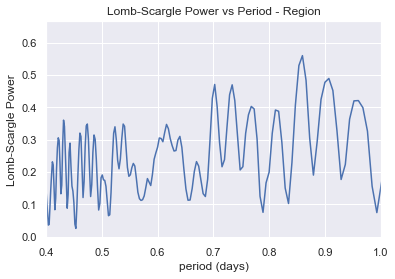

In [116]:
fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.4, 1.0), xlabel='period (days)',
       ylabel='Lomb-Scargle Power');
plt.title("Lomb-Scargle Power vs Period - Region")
plt.savefig('Lomb-Scargle Power vs Period - Region.png', dpi=300, bbox_inches='tight')

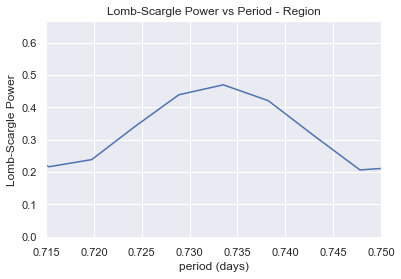

In [115]:
fig, ax = plt.subplots()
ax.plot(periods, power)
ax.set(xlim=(0.715, 0.75), xlabel='period (days)',
       ylabel='Lomb-Scargle Power');
plt.title("Lomb-Scargle Power vs Period - Region")
plt.savefig('Lomb-Scargle Power vs Period - Region - FWHM.png', dpi=300, bbox_inches='tight')

In [103]:
# set range and find period
model.optimizer.period_range=(0.2, 1.0)
period = model.best_period
print("period = {0}".format(period))

period = 0.7015558138761311


In [104]:
# Compute phases of the obsevations
phase = (t2 / period) % 1

# Compute best-fit RR Lyrae template
from astropy.timeseries import LombScargle as LS
frequency, power = LS(t2, mag, dmag).autopower(minimum_frequency=0.1,
                                                   maximum_frequency=1.9,
                                                   samples_per_peak=10)

In [83]:
best_frequency = frequency[np.argmax(power)]
phase = (t2 / period) % 1
t_fit = np.linspace(0, 1)
ls = LS(t2, mag, dmag)
y_fit = ls.model(t_fit, best_frequency)

In [84]:
t_fit.shape

(50,)

In [85]:
best_frequency**-1

0.7288054031120456

In [100]:
from scipy import optimize

def test_func(x, a, b, c):
    return a * np.sin(2 * np.pi * x + b) + c

params, params_covariance = optimize.curve_fit(test_func, phase, mag,
                                               p0=[2, 2, 14])

print(params)

[ 0.29870259  3.30789793 13.96378657]


In [117]:
params[2] - params[0]

13.665083982485422

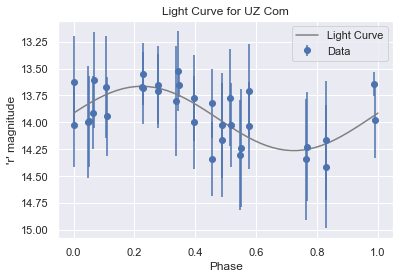

In [102]:
# Compute phases of the obsevations
phase = (t2 / period) % 1

fig, ax = plt.subplots()
ax.errorbar(phase, mag, dmag, fmt='o', label='Data')
# ax.plot(t_fit, y_fit, '-', color='gray')
plt.plot(t_fit, test_func(t_fit, params[0], params[1], params[2]), '-', color='gray',
         label='Light Curve')
ax.set(xlabel='Phase', ylabel="'r' magnitude")
ax.invert_yaxis()
plt.title("Light Curve for UZ Com")
# plt.ylim([13.0, 15.0])
plt.legend()
plt.savefig('Light Curve.png', dpi=300, bbox_inches='tight')